In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch,VerticalPitch

In [2]:
response=requests.get("https://www.sofascore.com/football/match/valencia-barcelona/rgbsDgb#id:14083216,tab:statistics")

In [3]:
response.status_code

200

In [4]:
soup=BeautifulSoup(response.text,"html.parser")


In [5]:
soup.select('g[cursor="pointer"]')

[]

In [6]:
response.status_code

200

In [7]:
headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'referer': 'https://www.sofascore.com/football/match/valencia-barcelona/rgbsDgb',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/139.0.0.0 Safari/537.36',
}

url = 'https://www.sofascore.com/api/v1/event/14083216/shotmap'

response = requests.get(url, headers=headers)

print(response.status_code) 

200


In [8]:
shots=response.json()

In [10]:
df=pd.json_normalize(shots["shotmap"])

In [11]:
df.head()

,isHome,shotType,goalType,situation,bodyPart,goalMouthLocation,xg,xgot,id,time,...,draw.end.x,draw.end.y,draw.goal.x,draw.goal.y,blockCoordinates.x,blockCoordinates.y,blockCoordinates.z,draw.block.x,draw.block.y,player.firstName
0,True,goal,regular,assisted,right-foot,low-centre,0.582003,0.366756,5661125,86,...,51.5,0,51.5,82.9,NaN,NaN,NaN,NaN,NaN,NaN
1,True,miss,NaN,assisted,right-foot,high-left,0.059375,0.000000,5661085,81,...,37.8,0,37.8,15.3,NaN,NaN,NaN,NaN,NaN,NaN
2,False,miss,NaN,assisted,right-foot,left,0.029579,0.000000,5661080,80,...,18.0,0,18.0,93.1,3.1,53.4,0.0,53.4,3.1,NaN
3,True,miss,NaN,regular,right-foot,left,0.022361,0.000000,5661074,79,...,33.6,0,33.6,91.7,NaN,NaN,NaN,NaN,NaN,NaN
4,True,goal,regular,assisted,right-foot,high-right,0.615995,0.862988,5661065,76,...,52.3,0,52.3,74.1,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df=df[["isHome","shotType","xg","xgot","time","player.shortName","playerCoordinates.x","playerCoordinates.y","goalMouthCoordinates.x","goalMouthCoordinates.y"]]

In [13]:
df

,isHome,shotType,xg,xgot,time,player.shortName,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,goal,0.582003,0.366756,86,R. Lewandowski,11.6,43.6,0,48.5
1,True,miss,0.059375,0.000000,81,D. Olmo,20.7,67.3,0,62.2
2,False,miss,0.029579,0.000000,80,L. Ramazani,9.2,73.0,0,82.0
3,True,miss,0.022361,0.000000,79,Pedri,26.7,47.6,0,66.4
4,True,goal,0.615995,0.862988,76,R. Lewandowski,13.4,53.6,0,47.7
5,True,block,0.075125,0.000000,74,Raphinha,13.3,56.2,0,48.6
6,True,save,0.031279,0.075777,74,F. López,12.3,29.7,0,53.1
7,False,save,0.111065,0.288409,71,L. Rioja,10.1,36.0,0,49.6
8,True,miss,0.106511,0.000000,70,Raphinha,14.4,58.1,0,61.8
9,True,goal,0.054685,0.065289,66,Raphinha,15.0,62.3,0,47.4


In [14]:
df["playerCoordinates.x"]=df["playerCoordinates.x"]*1.2
df["playerCoordinates.y"]=df["playerCoordinates.y"]*0.8
df["goalMouthCoordinates.x"]=df["goalMouthCoordinates.x"]*1.2
df["goalMouthCoordinates.y"]=df["goalMouthCoordinates.y"]*0.8

In [15]:
df

,isHome,shotType,xg,xgot,time,player.shortName,playerCoordinates.x,playerCoordinates.y,goalMouthCoordinates.x,goalMouthCoordinates.y
0,True,goal,0.582003,0.366756,86,R. Lewandowski,13.92,34.88,0.0,38.80
1,True,miss,0.059375,0.000000,81,D. Olmo,24.84,53.84,0.0,49.76
2,False,miss,0.029579,0.000000,80,L. Ramazani,11.04,58.40,0.0,65.60
3,True,miss,0.022361,0.000000,79,Pedri,32.04,38.08,0.0,53.12
4,True,goal,0.615995,0.862988,76,R. Lewandowski,16.08,42.88,0.0,38.16
5,True,block,0.075125,0.000000,74,Raphinha,15.96,44.96,0.0,38.88
6,True,save,0.031279,0.075777,74,F. López,14.76,23.76,0.0,42.48
7,False,save,0.111065,0.288409,71,L. Rioja,12.12,28.80,0.0,39.68
8,True,miss,0.106511,0.000000,70,Raphinha,17.28,46.48,0.0,49.44
9,True,goal,0.054685,0.065289,66,Raphinha,18.00,49.84,0.0,37.92


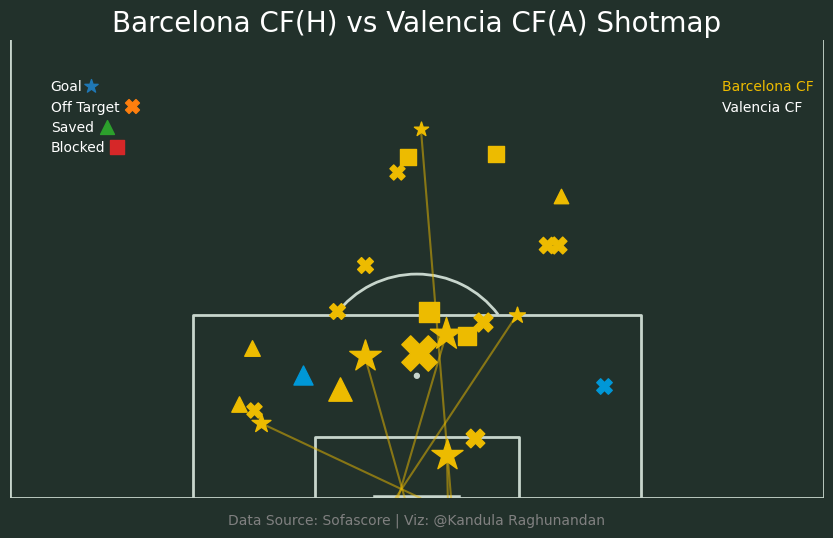

In [27]:
fig, ax=plt.subplots(figsize=(10.5,7))
fig.set_facecolor("#22312b")
ax.patch.set_facecolor("#22312b")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',half=True)
pitch.draw(ax=ax, constrained_layout=True, tight_layout=False)
plt.gca().invert_yaxis()

ax.set_xlim(0,80)
ax.set_ylim(0,45)

for x in range(len(df["playerCoordinates.x"])):
    if (df["isHome"][x]==True):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#edbb00",s=df["xg"][x]*800+100,marker="^")
        if df["shotType"][x]=="miss":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#edbb00",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#edbb00",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#edbb00",s=df["xg"][x]*800+100,marker="*")
            plt.plot((df["playerCoordinates.y"][x],df["goalMouthCoordinates.y"][x]),(df["playerCoordinates.x"][x],df["goalMouthCoordinates.x"][x]),color="#edbb00",alpha=0.5)
    if (df["isHome"][x]==False):
        if df["shotType"][x]=="save":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#0097d7",s=df["xg"][x]*800+100,marker="^")
        if df["shotType"][x]=="miss":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#0097d7",s=df["xg"][x]*800+100,marker="X")
        if df["shotType"][x]=="block":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#0097d7",s=df["xg"][x]*800+100,marker="s")
        if df["shotType"][x]=="goal":
            plt.scatter(y=df["playerCoordinates.x"][x],x=df["playerCoordinates.y"][x],color="#0097d7",s=df["xg"][x]*800+100,marker="*")

plt.title("Barcelona CF(H) vs Valencia CF(A) Shotmap",color="white",size="20")
ax.text(4,40,"Goal",c="white")
ax.scatter(8,40.5,marker="*",s=100)
ax.text(4,38,"Off Target",color="white")
ax.scatter(12,38.5,marker="X",s=100)
ax.text(4,36,"Saved",color="white")
ax.scatter(9.5,36.5,marker="^",s=100)
ax.text(4,34,"Blocked",color="white")
ax.scatter(10.5,34.5,marker="s",s=100)

ax.text(70,40,"Barcelona CF",c="#edbb00")
ax.text(70,38,"Valencia CF",c="#FFFFFF")


plt.text(
    0.5, -0.05, "Data Source: Sofascore | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)
plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Barcelona vs Valencia 2025.png")